Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kira Kuznetsova"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = self.xk.shape[0]
        def L(x, n, k):
            result = 1
            for i in range(n):
                if i != k:
                    result *= (x - self.xk[i]) / (self.xk[k] - self.xk[i])
            return result
        
        lagrange_val = 0
        for j in range(n):
            lagrange_val += self.yk[j] * L(x, n, j)
        return lagrange_val

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
import matplotlib.pyplot as plt

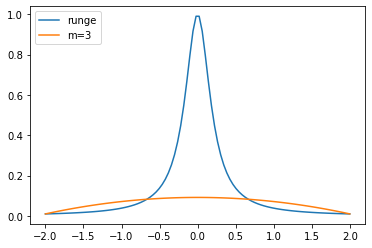

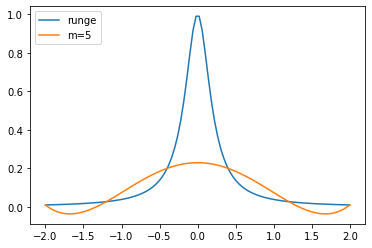

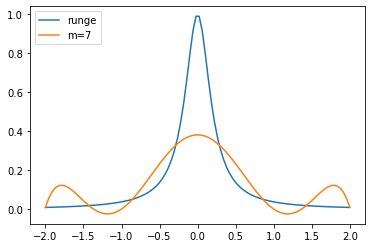

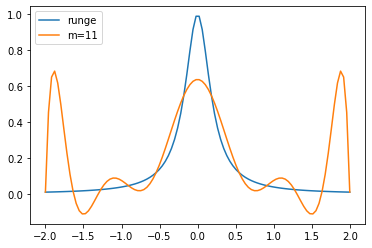

In [5]:
x = np.linspace(-2, 2, 100)
y = runge_func(x)
for m in [3, 5, 7, 11]:
    x_list = np.linspace(-2, 2, m + 1)
    y_list = runge_func(x_list)
    
    lagrange = LagrangeInterpolator(x_list, y_list)
    lagrange_list = np.array([lagrange(xi) for xi in x])
    plt.figure()
    plt.plot(x, y, label="runge")
    plt.plot(x, lagrange_list, label="m="+str(m))
    plt.legend(loc='upper left')
    plt.show()

Теперь будет интерполировать на узлах Чебышева

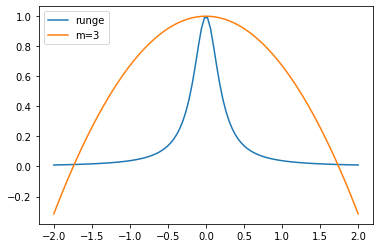

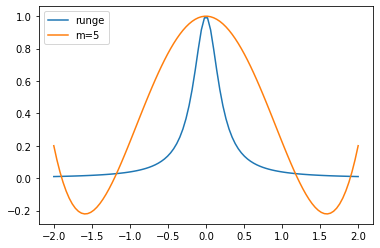

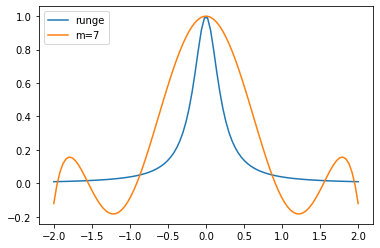

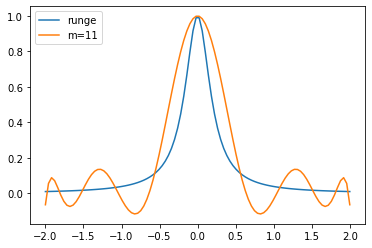

In [6]:
left = -2
right = 2
x = np.linspace(-2, 2, 100)
y = runge_func(x)
for m in [3, 5, 7, 11]:
    x_list = np.array([0.5 * (left + right) + 0.5 * (right - left) * \
                       np.cos(((2 * k - 1) * np.pi) / (2 * m)) \
                       for k in range(1, m + 1)])
    y_list = runge_func(x_list)
    lagrange = LagrangeInterpolator(x_list, y_list)
    lagrange_list = np.array([lagrange(xi) for xi in x])
    plt.figure()
    plt.plot(x, y, label="runge")
    plt.plot(x, lagrange_list, label="m="+str(m))
    plt.legend(loc='upper left')
    plt.show()

Как видим, качество интерполяции на равномерной сетке хуже, чем на узлах Чебышева.